In [231]:
from subprocess import check_call
from datetime import datetime
import importlib
import matplotlib.colors as col
import matplotlib.pyplot as plt
import matplotlib as mpl
import matplotlib.cm as cm
import matplotlib.ticker as ticker
import math
from mpl_toolkits.mplot3d import Axes3D
import pdb
import pickle
from DebugObjectModule import DebugObject


This file will calculate $x$ at $y=0$ for the single particle for creation of plot for thesis

## Set number and Run number

In [707]:
set_num = "06"
Run_num = "single_arbitrary_eta_"+"08"

## Main Code

Using initial conditions from  input.thesis.Eta_Plot.single_arbitrary_eta_08
<class 'DebugObjectModule.DebugObject'>
px = 1000
pz = 0
vx = 0.999999500000375
vz = 0.7071066044099185
alpha = 1.5707963267948966
gamma = 1000.000499999875

slope = -0.00012950105233014905, intercept = 0.29999093034933955
y = 0 when x = 2316.5134564663213

06-08 Copied to clipboard! at 11:50:52


0

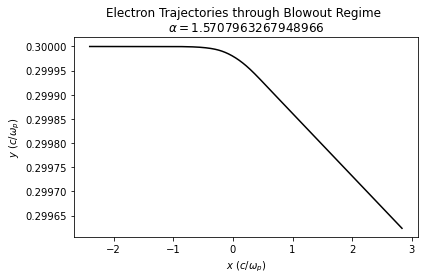

In [708]:
input_fname_1 = str(f"input.thesis.Eta_Plot.{Run_num}")
print("Using initial conditions from ", input_fname_1)
init = importlib.import_module(input_fname_1)
sim_name = init.simulation_name
shape_name = init.shape
xden = init.xdensity
yden = init.ydensity
xiden = init.xidensity
res = init.resolution
iter = init.iterations
mode = init.mode
fname = init.fname
debugmode = init.debugmode
x_c = init.x_c
y_c = init.y_c
xi_c = init.xi_c
px_0 = init.px_0
py_0 = init.py_0
pz_0 = init.pz_0
x_s = init.x_s
s1 = init.s1
s2 = init.s2

# Load data from npz file export from main.py
data = np.load("./data/"+set_num+"/"+fname) # Change this line as needed
x_0 = data['x_init'][0]
y_0 = data['y_init'][0]
xi_0 = data['xi_init'][0]
z_0 = data['z_init'][0]
x_f = data['x_dat'][0]
y_f = data['y_dat'][0]
xi_f = data['xi_dat'][0]
z_f = data['z_dat'][0]
px_f = data['px_dat'][0]
py_f = data['py_dat'][0]
pz_f = data['pz_dat'][0]
t0 = data['t_dat']

file = open("./data/"+set_num+"/"+fname[:-4]+"-DEBUG.obj", 'rb') 
debug = pickle.load(file)[0]
file.close
print(debug)
print(type(debug))
x_dat = np.squeeze(debug.x_dat)
y_dat = np.squeeze(debug.y_dat)
z_dat = np.squeeze(debug.z_dat)
xi_dat = np.squeeze(debug.xi_dat)
Fx_dat = np.squeeze(debug.Fx_dat)
Fy_dat = np.squeeze(debug.Fy_dat)
Fz_dat = np.squeeze(debug.Fz_dat)
px_dat = np.squeeze(debug.px_dat)
py_dat = np.squeeze(debug.py_dat)

## Beta Calculation

def Gamma(p):
        return math.sqrt(1.0 + p**2)

def Velocity(px,ptot):
    # Returns relativistic velocity from momentum
    return px / Gamma(ptot)

px = px_0
py = py_0
pz = pz_0
p = math.sqrt(px**2 + py**2 + pz**2)
vx = Velocity(px, p)

if (pz == 0):
    alpha = math.atan(math.inf)
else:
    vx = Velocity(px, p)
    vz = Velocity(pz, p)
    alpha = math.atan(vx/vz)
gamma = math.sqrt(p**2 + 1)

print(f"px = {px}")
print(f"pz = {pz}")

print(f"vx = {vx}")
print(f"vz = {vz}")
print(f"alpha = {alpha}")
print(f"gamma = {gamma}")

#Create array for iterations
iterations = np.arange(0,len(xi_dat),1)
#print(iterations)

dt = 0.005 #Timestep in 1/w_p

#Create array for times
time = iterations*dt
#print(time)

t=len(x_dat)*dt + 51.9948

fig1, ax1 = plt.subplots(1)
ax1.set_xlabel(r"$x$ ($c/\omega_p$)")
ax1.set_ylabel(r"$y$ ($c/\omega_p$)")
ax1.set_title(f"Electron Trajectories through Blowout Regime \n"+r"$\alpha=$"+f"{alpha}")
ax1.ticklabel_format(style='plain', axis='y',useOffset=False)

for i in range(0, 1):
    ax1.plot(x_dat[:], y_dat[:],  'k', label='$time-Xi Trajectory') # Want vertical axis as y

fig1.tight_layout()
fig1.savefig("Group_Velocity_Verification_"+fname[:-4]+".png", transparent=False)

slope = (y_dat[-1]-y_dat[-2])/(x_dat[-1]-x_dat[-2])
intercept = y_dat[-1]-(slope*x_dat[-1])

print(f"\nslope = {slope}, intercept = {intercept}")

root = ((-1.)*(intercept))/(slope)
print(f"y = 0 when x = {root}\n")

root = str(root)

def copy2clip(txt):
    cmd='echo '+txt.strip()+'|pbcopy'
    now = datetime.now()
    current_time = now.strftime("%I:%M:%S")
    print(set_num+"-"+Run_num[-2:]+" Copied to clipboard! at "+current_time)
    return check_call(cmd, shell=True)

copy2clip(root)

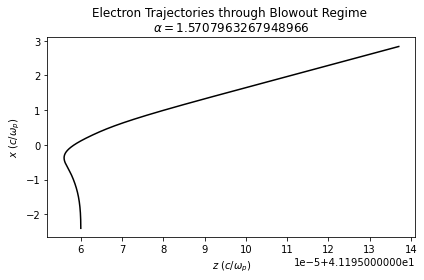

In [709]:
fig2, ax2 = plt.subplots(1)
ax2.set_xlabel(r"$z$ ($c/\omega_p$)")
ax2.set_ylabel(r"$x$ ($c/\omega_p$)")
ax2.set_title(f"Electron Trajectories through Blowout Regime \n"+r"$\alpha=$"+f"{alpha}")
ax2.ticklabel_format(style='plain', axis='y',useOffset=False)

ax2.plot(z_dat, x_dat,  'k', label='$time-Xi Trajectory') # Want vertical axis as y

fig2.tight_layout()